In [32]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


In [33]:
df = pd.read_csv("top_songs_large.csv")
df = df.head(200)

In [34]:
print(df.columns)

Index(['track_id', 'disc_number', 'duration', 'explicit', 'audio_feature_id',
       'name', 'preview_url', 'track_number', 'popularity', 'is_playable',
       'acousticness', 'analysis_url', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'artist',
       'genre_id'],
      dtype='object')


In [35]:
selected_cols = ['duration', 'explicit', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness','tempo', 'time_signature', 'valence']

In [36]:
X_selected = df[selected_cols]
scaler = StandardScaler()
X_selected = scaler.fit(X_selected).transform(X_selected)

In [37]:
pca_music = PCA(n_components=2).fit(X_selected)

In [38]:
pca_music.explained_variance_

array([3.45518909, 1.66632338])

In [39]:
pca_music.explained_variance_ratio_

array([0.26445486, 0.12753783])

In [40]:
round(pd.DataFrame(pca_music.components_.T,
             index = selected_cols,
             columns = ["PCA1", "PCA2"]),3)

,PCA1,PCA2
duration,-0.023,0.015
explicit,-0.048,-0.603
acousticness,0.347,-0.082
danceability,-0.328,-0.200
energy,-0.423,0.250
instrumentalness,0.353,0.137
key,0.036,0.061
liveness,-0.026,0.030
loudness,-0.472,0.131
speechiness,-0.076,-0.534


In [41]:
df["name_cleaned"] = df["name"].str.replace('[^a-zA-Z0-9\s]', '', regex=True)

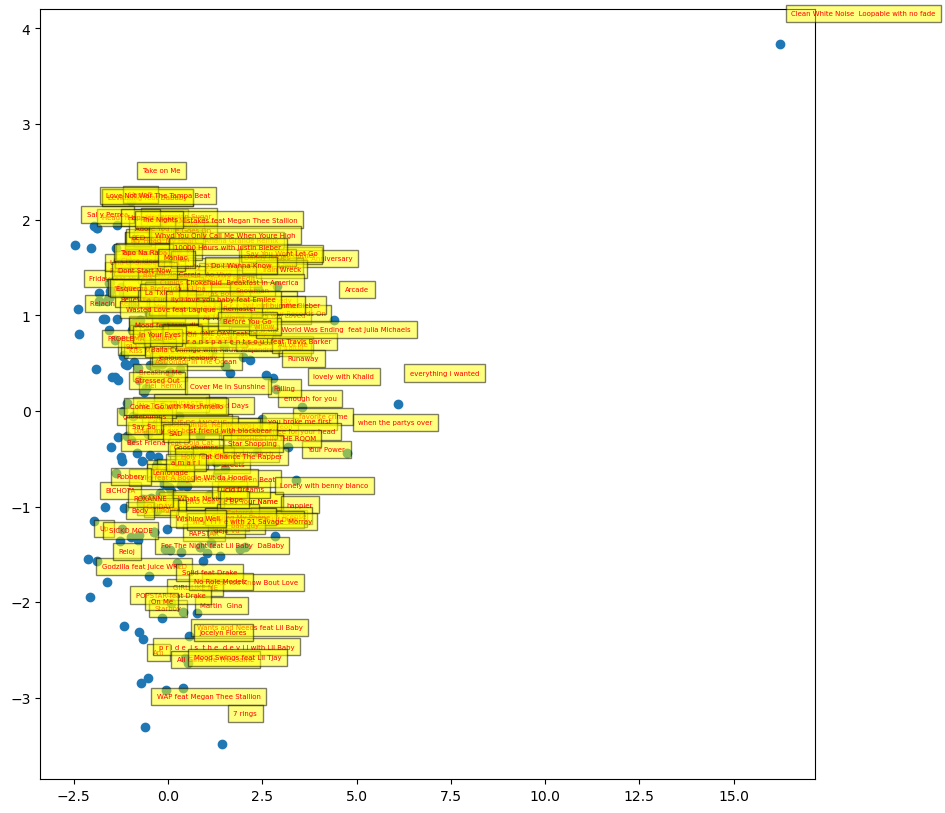

In [42]:
X_music_pca = pca_music.transform(X_selected)

fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(X_music_pca[:,0],X_music_pca[:,1])
for i in range(X_selected.shape[0]):
    plt.text(x=X_music_pca[i,0]+0.3,y=X_music_pca[i,1]+0.3,s=df["name_cleaned"][i],
        fontdict=dict(color='red',size=5),
        bbox=dict(facecolor='yellow',alpha=0.5))
plt.show()

In [43]:
target_name = 'Blame on Me'
target_name = 'Shine On You Crazy Diamond Pts 15'
row = df[df['name_cleaned'] == target_name]
print(row)

Empty DataFrame
Columns: [track_id, disc_number, duration, explicit, audio_feature_id, name, preview_url, track_number, popularity, is_playable, acousticness, analysis_url, danceability, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, time_signature, valence, artist, genre_id, name_cleaned]
Index: []

[0 rows x 26 columns]


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 1.542800
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.799629
[t-SNE] KL divergence after 1000 iterations: 0.653548


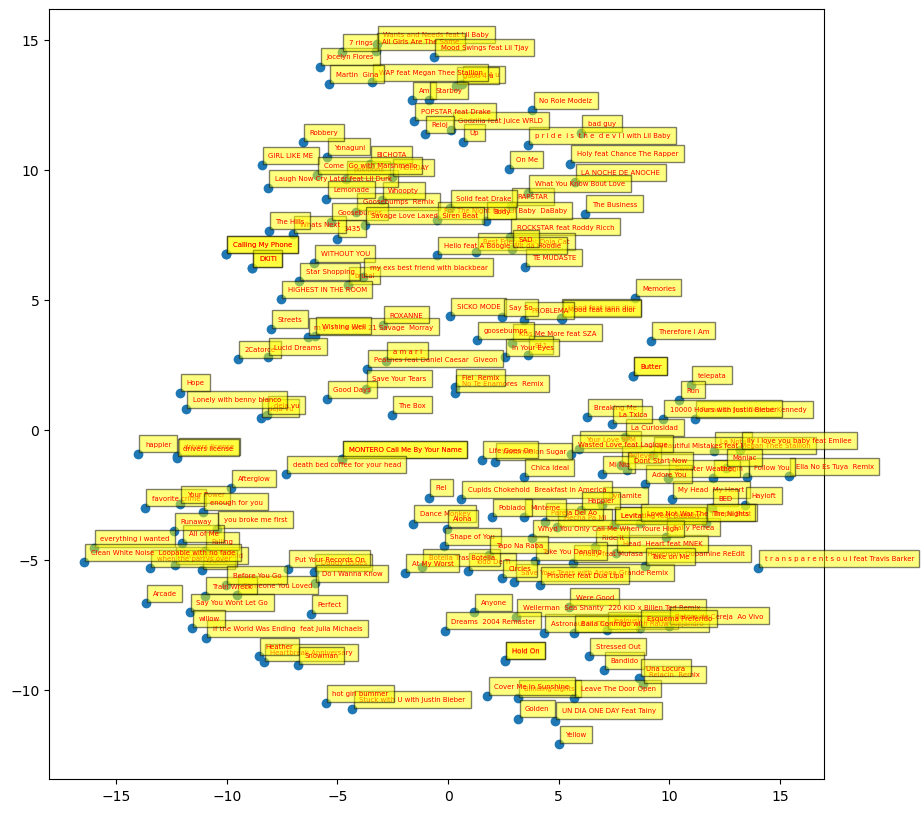

In [44]:
tsne = TSNE(verbose=1)
tsne_results = tsne.fit_transform(X_selected)
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(tsne_results[:,0], y= tsne_results[:,1])
for i in range(tsne_results.shape[0]):
  plt.text(x=tsne_results[i,0]+0.3,y=tsne_results[i,1]+0.3,s=df["name_cleaned"][i],
           fontdict=dict(color='red',size=5),
           bbox=dict(facecolor='yellow',alpha=0.5))
plt.show()